# Bibliothèque 

In [2]:
import tkinter as tk
import numpy as np
import networkx as nx
from xml.etree import ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import ast
from matplotlib.figure import Figure
import tkinter as tk
from tkinter import ttk, filedialog, messagebox, Text
from tkinter.scrolledtext import ScrolledText
import pyperclip  # Import the pyperclip module

# Algorithm Page Rank

In [5]:
def PageRank_score(graph, alpha=0.85, eps=1e-6):
    N = len(graph)
    P = np.zeros((N, N))

    for j in range(N):
        out_links = sum(graph[j])
        if out_links == 0:
            for i in range(N):
                P[i][j] = 1 / N
        else:
            for i in range(N):
                P[i][j] = alpha * (graph[j][i] / out_links) + (1 - alpha) / N

    R = np.ones(N) / N
    delta = 1
    iterations = 0

    while delta > eps:
        new_R = np.dot(P, R)
        delta = np.sum(np.abs(new_R - R))
        R = new_R
        iterations += 1

    print(f"Converged in {iterations} iterations.")
    return R

# Methode 1 : PageRank from adjacency matrix

In [8]:
def convertir_graph_en_matrice(graph):
    N = len(graph)
    matrice_adj = np.zeros((N, N))
    
    # Create an index map for nodes
    index_map = {node: idx for idx, node in enumerate(graph.keys())}
    
    # Fill adjacency matrix based on graph connections
    for node, voisins in graph.items():
        for voisin in voisins:
            matrice_adj[index_map[node], index_map[voisin]] = 1
            
    return matrice_adj

In [10]:
def PageRank_matrix(matrice, alpha=0.85, eps=1e-6):
    scores = PageRank_score(matrice, alpha, eps)
    return scores

# Methode 2 : PageRank from XML File

In [13]:
def construire_xml_graph(graph, nom_fichier="graph.xml"):
    # Création de l'élément racine
    root = ET.Element("graph")

    # Parcourir chaque nœud et ses voisins
    for node, neighbors in graph.items():
        # Ajouter un élément "node" pour chaque nœud
        node_element = ET.SubElement(root, "node", id=str(node))
        
        # Ajouter les voisins comme éléments enfants de ce nœud
        for neighbor in neighbors:
            ET.SubElement(node_element, "edge", target=str(neighbor))

    # Création de l'arbre XML
    tree = ET.ElementTree(root)
    
    # Écrire l'arbre dans un fichier XML
    with open(nom_fichier, "wb") as f:
        tree.write(f, encoding="utf-8", xml_declaration=True)

    print(f"Le fichier XML '{nom_fichier}' a été créé avec succès.")

In [15]:
# PageRank from XML graph representation
def PageRank_Xml(xml_file, alpha=0.85, eps=1.0e-6):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    nodes = root.findall('.//node')

    # Map node IDs to indices
    node_id_map = {node.get('id'): index for index, node in enumerate(nodes)}
    N = len(nodes)
    graph = np.zeros((N, N))

    # Populate the graph matrix based on XML structure
    for node in nodes:
        node_id = node.get('id')
        for edge in node.findall('.//edge'):
            target_id = edge.get('target')
            if target_id in node_id_map:
                graph[node_id_map[node_id], node_id_map[target_id]] = 1

    pagerank_scores = PageRank_score(graph, alpha, eps)
    scores_dict = {node_id: pagerank_scores[index] for node_id, index in node_id_map.items()}

    return scores_dict 


# Methode 3 : PageRank from Graph

In [18]:
def PageRank_Graph(graph_dict, alpha=0.85, eps=1.0e-6):
    nodes = list(graph_dict.keys())
    N = len(nodes)

    # Create an adjacency matrix from the graph dictionary
    G = np.zeros((N, N))
    for node, edges in graph_dict.items():
        for edge in edges:
            if edge in nodes:
                G[nodes.index(node), nodes.index(edge)] = 1

    # Calculate PageRank
    pagerank_scores = PageRank_score(G, alpha=alpha, eps=eps)
    pagerank_dict = {node: score for node, score in zip(nodes, pagerank_scores)}

    return pagerank_dict

In [20]:
def draw_graph(graph_dict):
    G = nx.DiGraph()
    for node, neighbors in graph_dict.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500, 
            node_color='lightblue', font_size=16, 
            font_color='blue', font_weight='bold', arrows=True)
    plt.title("Directed Graph")
    plt.show()
    
    return G

# Test

In [23]:
# G = {
#     'A': [],
#     'B': ['C'],
#     'C': ['B'],
#     'D': ['A', 'B'],
#     'E': ['B', 'D', 'F'],
#     'F': ['B', 'E'],
#     'G': ['B', 'E'],
#     'H': ['B', 'E'],
#     'I': ['B', 'E'],
#     'L': ['E'],
#     'M': ['E']
# }

In [25]:
G = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['A'],
    'D': ['A', 'B']
}

In [27]:
# Construire le fichier XML
construire_xml_graph(G, nom_fichier="graph.xml")

# Calculer les scores de PageRank à partir du fichier XML
pagerank_scores = PageRank_Xml("graph.xml")
print("Scores de PageRank :", pagerank_scores)

Le fichier XML 'graph.xml' a été créé avec succès.
Converged in 26 iterations.
Scores de PageRank : {'A': 0.3736078848629388, 'B': 0.21222085106674898, 'C': 0.37667126407031204, 'D': 0.0375}


In [29]:
convertir_graph_en_matrice(G)

array([[0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.]])

In [31]:
# Example: Adjacency matrix input
# adj_matrix = np.array([
#     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # A
#     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # B
#     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # C
#     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # D
#     [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # E
#     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # F
#     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # G
#     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # H
#     [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # I
#     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # L
#     [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]   # M
# ])
adj_matrix = np.array([
       [0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.]])
# Calculate and display PageRank scores
pagerank_scores = PageRank_matrix(adj_matrix)
print("Scores de PageRank :", pagerank_scores)

Converged in 26 iterations.
Scores de PageRank : [0.37360788 0.21222085 0.37667126 0.0375    ]


In [33]:
pagerank_scores = PageRank_Graph(G)
print("Scores de PageRank :", pagerank_scores)

Converged in 26 iterations.
Scores de PageRank : {'A': 0.3736078848629388, 'B': 0.21222085106674898, 'C': 0.37667126407031204, 'D': 0.0375}


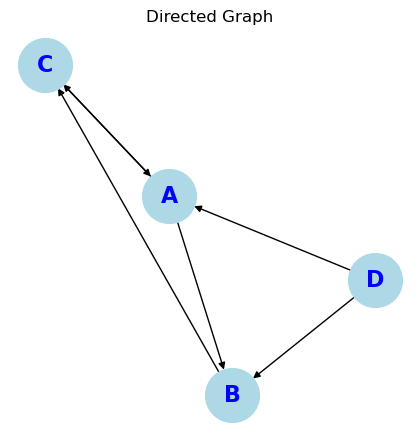

Scores de PageRank (NetworkX) : {'A': 0.3736086276232221, 'B': 0.21222116673986935, 'C': 0.37667020563690845, 'D': 0.037500000000000006}


In [35]:
# Draw the graph and get the NetworkX graph object
G_nx = draw_graph(G)
G_nx
# Calculate PageRank 
pagerank_scores_nx = nx.pagerank(G_nx, alpha=0.85)
print("Scores de PageRank (NetworkX) :", pagerank_scores_nx)

In [44]:
# GUI setup
app = tk.Tk()
app.title("Interface PageRank")
app.geometry("600x800")

# Tabs
notebook = ttk.Notebook(app)
notebook.pack(expand=True, fill="both")

# Graph Page
graph_page = ttk.Frame(notebook)
notebook.add(graph_page, text="Page Graph")

# Matrix Page
matrix_page = ttk.Frame(notebook)
notebook.add(matrix_page, text="Page Matrice")

# XML Page
xml_page = ttk.Frame(notebook)
notebook.add(xml_page, text="Page XML")

# Graph Page Widgets
tk.Label(graph_page, text="Entrer le Graph sous forme de dictionnaire:").pack()
graph_entry = ScrolledText(graph_page, height=5, width=60)
graph_entry.pack()

# Define functions
def draw_graph():
    try:
        graph_dict = eval(graph_entry.get("1.0", tk.END).strip())
        G = nx.DiGraph(graph_dict)
        fig, ax = plt.subplots(figsize=(5, 4))
        nx.draw(G, with_labels=True, ax=ax)
        
        # Clear previous canvas
        for widget in graph_page.winfo_children():
            if isinstance(widget, FigureCanvasTkAgg):
                widget.get_tk_widget().destroy()

        canvas = FigureCanvasTkAgg(fig, master=graph_page)
        canvas.draw()
        canvas.get_tk_widget().pack()
    except Exception as e:
        messagebox.showerror("Erreur", f"Erreur en dessinant le graph: {e}")

def calculate_page_rank_graph():
    try:
        graph_dict = eval(graph_entry.get("1.0", tk.END).strip())
        result = PageRank_Graph(graph_dict)
        messagebox.showinfo("Résultat PageRank", f"PageRank: {result}")
    except Exception as e:
        messagebox.showerror("Erreur", f"Erreur de calcul de PageRank: {e}")

def load_xml():
    filename = filedialog.asksaveasfilename(defaultextension=".xml", filetypes=[("XML files", "*.xml")])
    if filename:
        try:
            graph_dict = eval(graph_entry.get("1.0", tk.END).strip())
            construire_xml_graph(graph_dict, filename)
            messagebox.showinfo("Succès", f"Fichier XML créé: {filename}")
        except Exception as e:
            messagebox.showerror("Erreur", f"Erreur lors de la création XML: {e}")

def calculate_page_rank_xml():
    filename = filedialog.askopenfilename(filetypes=[("XML files", "*.xml")])
    if filename:
        try:
            result = PageRank_Xml(filename)
            result_str = f"Scores de PageRank : {result}"
            messagebox.showinfo("PageRank XML", result_str)
        except Exception as e:
            messagebox.showerror("Erreur", f"Erreur de calcul de PageRank depuis XML: {e}")

def convert_to_matrix():
    try:
        graph_dict = eval(graph_entry.get("1.0", tk.END).strip())
        matrix = convertir_graph_en_matrice(graph_dict)
        labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']
        matrix_str_lines = [f"    {list(map(int, row))},  # {labels[i]}" for i, row in enumerate(matrix)]
        matrix_str = "[\n" + "\n".join(matrix_str_lines) + "\n]"
        pyperclip.copy(matrix_str)
        messagebox.showinfo("Matrice d'adjacence", f"Matrice copiée:\n{matrix_str}\n\nLa matrice a été copiée dans le presse-papiers.")
    except Exception as e:
        messagebox.showerror("Erreur", f"Erreur de conversion en matrice: {e}")

# Add buttons to graph page
tk.Button(graph_page, text="Dessiner le Graph", command=draw_graph).pack()
tk.Button(graph_page, text="Calculer PageRank (Graph)", command=calculate_page_rank_graph).pack()
tk.Button(graph_page, text="Créer XML à partir du Graph", command=load_xml).pack()
tk.Button(graph_page, text="Convertir le Graph en Matrice et Copier", command=convert_to_matrix).pack()

# Matrix Page Widgets
tk.Label(matrix_page, text="Entrer la Matrice Adjacente:").pack()
matrix_entry = ScrolledText(matrix_page, height=5, width=60)
matrix_entry.pack()

def calculate_page_rank_matrix():
    try:
        matrix = eval(matrix_entry.get("1.0", tk.END).strip())
        pagerank_result = PageRank_score(np.array(matrix))
        messagebox.showinfo("PageRank Matrice", f"PageRank: {pagerank_result}")
    except Exception as e:
        messagebox.showerror("Erreur", f"Erreur de calcul de PageRank: {e}")

# Add button to matrix page
tk.Button(matrix_page, text="Calculer PageRank (Matrice)", command=calculate_page_rank_matrix).pack()

# XML Page Widgets
tk.Label(xml_page, text="PageRank depuis File XML").pack(pady=10)
tk.Button(xml_page, text="Calculer PageRank (XML)", command=calculate_page_rank_xml).pack()

# Start the application
app.mainloop()

# Built-in PageRank 

In [40]:
# graph_dict = {
#     'A': [],
#     'B': ['C'],
#     'C': ['B'],
#     'D': ['A', 'B'],
#     'E': ['B', 'D', 'F'],
#     'F': ['B', 'E'],
#     'G': ['B', 'E'],
#     'H': ['B', 'E'],
#     'I': ['B', 'E'],
#     'L': ['E'],
#     'M': ['E']
# }

graph_dict = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['A'],
    'D': ['A', 'B']
}

# Create a directed graph from the dictionary
graph = nx.DiGraph()

# Add edges to the graph based on the input dictionary
for node, edges in graph_dict.items():
    for edge in edges:
        graph.add_edge(node, edge)

# Calculate PageRank using NetworkX directly
page_rank_scores = nx.pagerank(graph, alpha=0.85)

# Output the PageRank scores formatted to one decimal place
for node, score in page_rank_scores.items():
    print({node: f"{score:.6f}"})

{'A': '0.373609'}
{'B': '0.212221'}
{'C': '0.376670'}
{'D': '0.037500'}


In [42]:
# Create a directed graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Define node labels (to match your original labels)
node_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M']

# Relabel the nodes in the graph
G = nx.relabel_nodes(G, {i: label for i, label in enumerate(node_labels)})

# Calculate PageRank using NetworkX
page_rank_scores_A = nx.pagerank(G, alpha=0.85)

for node, score in page_rank_scores_A.items():
    print({node: f"{score:.6f}"})

{'A': '0.373609'}
{'B': '0.212221'}
{'C': '0.376670'}
{'D': '0.037500'}
